#Analyzing Brazillian Deputies Reimbursement Requests

In [1]:
import pandas as pd

df = pd.read_csv('cota-parlamentar.csv')

# Let's clean up a bit.
independent_deputies = ['ATHOS AVELINO', 'FERNANDO ESTIMA', 'JOÃO FONTES', 'LID.GOV-CD', 'LID.GOV-CD', 'LID.GOV-CN', 'LIDMIN', 'LUIZ MOREIRA', 'PROFESSOR LUIZINHO', 'S.PART.']
for i in independent_deputies:
    df = df[df['sgpartido'] != i]

df['sgpartido'] = df['sgpartido'].replace({'PATRI': 'PATRIOTA', 'PMDB': 'MDB', 'REPUBLICANOS': 'PRB', 'PTdoB': 'AVANTE', 'PP**': 'PP', 'SOLIDARIEDADE': 'SD', 'SDD': 'SD', 'PPL': 'PCdoB'})
print(df.sgpartido.value_counts())

PT           607034
MDB          482351
PSDB         380288
PP           352675
DEM          261112
PR           252143
PSD          223109
PSB          210674
PDT          144673
PTB          114988
PCdoB        103734
PRB           90844
SD            83743
PSC           79302
PROS          74834
PPS           72937
PV            64285
PODE          58005
PSL           50552
PSOL          32961
AVANTE        28521
PL            19555
PATRIOTA      17385
PHS           12157
PMN            8114
CIDADANIA      5464
REDE           5448
PRP            4039
PTC            3742
NOVO           3266
PEN             729
PRTB            268
PSDC            236
PTN              55
Name: sgpartido, dtype: int64


### There are several Columns:
 'codlegislatura', 'datemissao', 'idedocumento', 'idecadastro',
       'indtipodocumento', 'nucarteiraparlamentar', 'nudeputadoid',
       'nulegislatura', 'numano', 'numespecificacaosubcota', 'numlote',
       'nummes', 'numparcela', 'numressarcimento', 'numsubcota', 'sgpartido',
       'sguf', 'txnomeparlamentar', 'txtcnpjcpf', 'txtdescricao',
       'txtdescricaoespecificacao', 'txtfornecedor', 'txtnumero',
       'txtpassageiro', 'txttrecho', 'vlrdocumento', 'vlrglosa', 'vlrliquido',
       'vlrrestituicao'
### Columns prefixed with num are references to other columns in numerical form.
### To analyze their expenditure, we will find the document value in the column "vlrdocumento" and how much was reimbuhersed in the "vlrrestituicao".
### 

In [2]:
deputies_year = df.groupby(['nudeputadoid','sgpartido', 'numano']).vlrdocumento.sum().reset_index().groupby(['sgpartido', 'numano']).vlrdocumento.mean().reset_index()
print(deputies_year)


    sgpartido  numano   vlrdocumento
0      AVANTE    2009  224879.010000
1      AVANTE    2010  346646.860000
2      AVANTE    2011  237309.752000
3      AVANTE    2012  264523.397500
4      AVANTE    2013  405861.990000
..        ...     ...            ...
281        SD    2016  405400.946364
282        SD    2017  391021.288182
283        SD    2018  324880.471667
284        SD    2019  303756.208000
285        SD    2020   30659.723333

[286 rows x 3 columns]


Now that we have how much each Party spent on average per deputy, we could visualize it. First we should import our visualization tools, then we could take a look at their mean public money expenses per year per deputy:

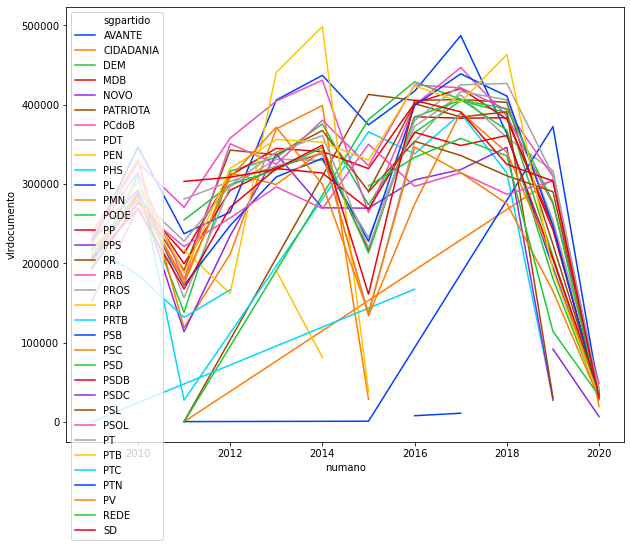

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data = deputies_year, x='numano', y='vlrdocumento',ax=ax, hue='sgpartido', palette='bright')

plt.show()

It's  a bit messy! Brazil has 29 Parties fighting for power. We can clearly see that happening: there is a decrease in resource investment after Brazil's federal elections. It happened in 2010, 2014 and 2018.
We could also take a look at publicization of their activities:

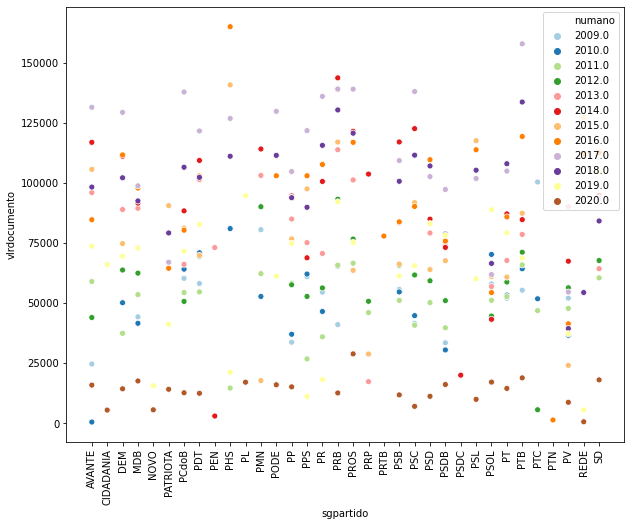

In [4]:
publicization = df.where(df['txtdescricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.').groupby(['nudeputadoid','sgpartido', 'numano']).vlrdocumento.sum().reset_index().groupby(['sgpartido', 'numano']).vlrdocumento.mean().reset_index()

#brighter colors are election years. We could also spin things a bit, maybe parties on the x axis might help
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data = publicization, x='sgpartido', y='vlrdocumento', ax=ax, hue='numano', palette='Paired')
plt.xticks(rotation=90)
plt.show()

Here we can visualize a bit better how things are going. There are many things happening, but each year follows a trend, 2014 and 2018 (red and purple dots), federal elections, had big budgets for publicization for most parties. PT, the Workers' Party, which was in power between the years 2002 and 2015 seems pretty consistent for the period between 2019 and 2020. NOVO, which stand for New, which claims that it won't use public money and will use its own instead, seems like it is keeping its word.
We could also group those parties by ideological classification. So let's import a classification made by several groups since 1997. We'll be using the one made by "Congresso em Foco". It's the most recent one, it classifies between esquerda (left), centro (center) and direita (right), and uses every candidates votes to classify their political ideology.

In [5]:

ideologies = pd.read_csv('parties_ideologies.csv')
ideologies = ideologies.rename(columns={'Nome': 'sgpartidob', 'Congresso em Foco (2019)[52]': 'ideologia'})
ideologies = ideologies[['sgpartidob', 'ideologia']]
ideologies['sgpartidob'] = ideologies['sgpartidob'].replace({'Patriota': 'PATRIOTA', 'Republicanos': 'PRB', 'Avante': 'AVANTE', 'Solidariedade': 'SD', 'Cidadania': 'CIDADANIA'})
ideologies['numideologia'] = ideologies.apply(lambda x: 0 if x['ideologia'] =='esquerda' else 1 if x['ideologia'] == 'centro' else 2 if x['ideologia'] == 'direita' else 0, axis=1)

print(ideologies)

   sgpartidob ideologia  numideologia
0      AVANTE    centro             1
1          DC   direita             2
2         DEM   direita             2
3         MDB    centro             1
4        NOVO   direita             2
5    PATRIOTA   direita             2
6         PCB         —             0
7       PCdoB  esquerda             0
8         PCO         —             0
9         PDT  esquerda             0
10         PL   direita             2
11        PMB   direita             2
12        PMN  esquerda             0
13       PODE   direita             2
14         PP   direita             2
15  CIDADANIA  esquerda             0
16        PRB   direita             2
17       PROS    centro             1
18       PRTB   direita             2
19        PSB  esquerda             0
20        PSC   direita             2
21        PSD   direita             2
22       PSDB    centro             1
23        PSL   direita             2
24       PSOL  esquerda             0
25       PST

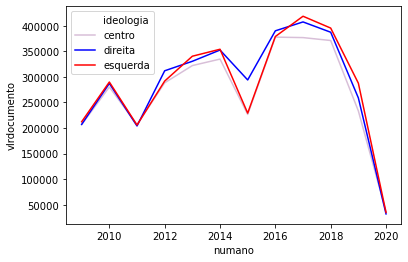

In [6]:
data = pd.merge(df, ideologies, how='left', left_on='sgpartido', right_on='sgpartidob')
expenses_by_ideology = data.groupby(['nudeputadoid','ideologia', 'numano']).vlrdocumento.sum().reset_index().groupby(['ideologia', 'numano']).vlrdocumento.mean().reset_index()
sns.lineplot(data=expenses_by_ideology, x='numano', y='vlrdocumento', hue='ideologia', palette={'esquerda':'red', 'direita': 'blue', 'centro':'thistle'})
plt.show()

Everything seems pretty competitive. What about publicization expenses?

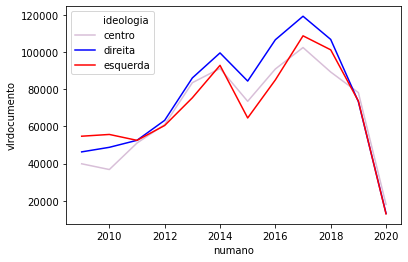

In [7]:
publicization_expenses_by_ideology = data.where(data['txtdescricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.').groupby(['nudeputadoid','ideologia', 'numano']).vlrdocumento.sum().reset_index().groupby(['ideologia', 'numano']).vlrdocumento.mean().reset_index()
sns.lineplot(data=publicization_expenses_by_ideology, x='numano', y='vlrdocumento', hue='ideologia', palette={'esquerda':'red', 'direita': 'blue', 'centro':'thistle'})
plt.show()

They all seem pretty similar. Right wing had a clear increase after 2012 (local left wing protest turned into conservative protests). Despite being very similar, could we predict political ideology with the data we have so far? Every row represents an expense, but are they somehow typical?  
As features we could use:  
Year: 'numano', Value : "vlrdocumento", Region: 'sguf', and a description: 'txtdescricao'


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
data['txtdescricao'] = encoder1.fit_transform(data['txtdescricao'].apply(str))
data['sguf'] = encoder2.fit_transform(data['sguf'].apply(str))

features = data[['numano', 'vlrdocumento', 'sguf', 'txtdescricao']].fillna(0)
labels = data['numideologia'].fillna(1)
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size =0.1)
model = RandomForestClassifier(n_estimators=100,  warm_start=True).fit(x_train, y_train)
y_predict = model.predict(x_test)
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test,y_predict))


0.5305346783642443
[[59182 30629 28443]
 [28162 78758 31958]
 [28099 33417 66275]]
              precision    recall  f1-score   support

         0.0       0.51      0.50      0.51    118254
         1.0       0.55      0.57      0.56    138878
         2.0       0.52      0.52      0.52    127791

    accuracy                           0.53    384923
   macro avg       0.53      0.53      0.53    384923
weighted avg       0.53      0.53      0.53    384923



Maybe a Deep Learning Model could perform better:

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.losses import sparse_categorical_crossentropy
import numpy as np
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size =0.1)
ct = ColumnTransformer([("scale", StandardScaler(), ['numano','vlrdocumento', 'sguf', 'txtdescricao'])], remainder='passthrough')
features_train = ct.fit_transform(features_train)
features_test = ct.transform(features_test)
seq = Sequential()
seq.add(Input(shape=(features.shape[1],)))
seq.add(Dense(32, activation='relu'))
seq.add(Dropout(0.2))
seq.add(Dense(32, activation='relu'))
seq.add(Dense(3, activation='softmax'))
seq.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

seq.fit(features_train, labels_train, epochs=10, batch_size=200, validation_split=0.1)

labels_predict = np.argmax(seq.predict(features_test), axis=-1)
print(classification_report(labels_test, labels_predict))

3667251    0.0
3133599    2.0
2564608    2.0
1896624    2.0
3053744    0.0
          ... 
1954623    0.0
2427044    2.0
1050914    1.0
593023     0.0
3375078    1.0
Name: numideologia, Length: 384923, dtype: float64
Epoch 1/10
15590/15590 [==============================] - 19s 1ms/step - loss: 1.0766 - accuracy: 0.4102 - val_loss: 1.0704 - val_accuracy: 0.4204
Epoch 2/10
15590/15590 [==============================] - 18s 1ms/step - loss: 1.0701 - accuracy: 0.4198 - val_loss: 1.0654 - val_accuracy: 0.4285
Epoch 3/10
15590/15590 [==============================] - 18s 1ms/step - loss: 1.0659 - accuracy: 0.4269 - val_loss: 1.0617 - val_accuracy: 0.4322
Epoch 4/10
15590/15590 [==============================] - 18s 1ms/step - loss: 1.0631 - accuracy: 0.4319 - val_loss: 1.0588 - val_accuracy: 0.4380
Epoch 5/10
15590/15590 [==============================] - 18s 1ms/step - loss: 1.0617 - accuracy: 0.4346 - val_loss: 1.0577 - val_accuracy: 0.4396
Epoch 6/10
15590/15590 [=========================

Weird! I've really tried by RandomForestClassifier outperforms a simple Neural Network every single time. How could it be?